In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
from nltk import sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/amazon_fashion_final.csv', index_col = 0)
df.head()

,overall,verified,reviewTime,reviewerID,reviewText,year,title
799875,1,True,2016-07-18,A3AFERGBO6RGQ1,Would be super sexy if you are only about 4 ft...,2016,Roswear Women's Lady Lux Viper Reversible Mono...
526330,1,True,2016-11-29,A2JR0N75Y820MF,Tiny fit and terrible print! Got it for my bro...,2016,RAISEVERN Colorful Tree Printed Freedom Zipper...
180661,1,True,2016-01-31,A3KSNM9AJ8M8LO,got to wear it once then the elephant (which i...,2016,Mother's Day Gift--BlueTop(TM) Love Silver Inf...
506926,1,True,2016-02-11,A13YEGI5SH0Z1D,The sleeves were 3/4 not long sleeves like the...,2016,T Shirts Long Sleeve Orange Lace for Women-bac...
568921,1,True,2016-09-24,AQ7S2E76198LU,Looks even better than the picture. This is m...,2016,DGY Multi-colored Cow Leather Top Handle Handb...


In [ ]:
df = df[['overall', 'reviewText', 'title']]
df.head()

,overall,reviewText,title
0,1,Would be super sexy if you are only about 4 ft...,Roswear Women's Lady Lux Viper Reversible Mono...
1,1,Tiny fit and terrible print! Got it for my bro...,RAISEVERN Colorful Tree Printed Freedom Zipper...
2,1,got to wear it once then the elephant (which i...,Mother's Day Gift--BlueTop(TM) Love Silver Inf...
3,1,The sleeves were 3/4 not long sleeves like the...,T Shirts Long Sleeve Orange Lace for Women-bac...
4,1,Looks even better than the picture. This is m...,DGY Multi-colored Cow Leather Top Handle Handb...


In [ ]:
df = df.reset_index()

In [ ]:
df.shape

(110000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       110000 non-null  int64 
 1   overall     110000 non-null  int64 
 2   reviewText  110000 non-null  object
 3   title       110000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.4+ MB


In [ ]:
df2 = pd.DataFrame([], columns = ['column_num', 'sentence'])
df2.head()

,column_num,sentence


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   column_num  0 non-null      object
 1   sentence    0 non-null      object
dtypes: object(2)
memory usage: 0.0+ bytes


In [ ]:
for i, text in enumerate(df.reviewText):
  tokenized_text = sent_tokenize(text)

  for save in tokenized_text:
    df2.loc[df2.shape[0]] = [i, save]

  if i % 1000 == 0:
    print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000


In [ ]:
df2.head()

,column_num,sentence
0,0,Would be super sexy if you are only about 4 ft...
1,0,"I'm 5'5"" and this barely stretched to the unde..."
2,0,Don't waste your $
3,1,Tiny fit and terrible print!
4,1,Got it for my brother who normally wears a large.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279057 entries, 0 to 279056
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  279057 non-null  int64 
 1   sentence    279057 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
df2.to_csv('/content/drive/MyDrive/data/text_to_sentence.csv', index = False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df3 = pd.merge(df2, df, how = 'right', left_on = 'column_num', right_index = True)
df3.head()

,column_num,sentence,index,overall,reviewText,title
0,0,Would be super sexy if you are only about 4 ft...,0,1,Would be super sexy if you are only about 4 ft...,Roswear Women's Lady Lux Viper Reversible Mono...
1,0,"I'm 5'5"" and this barely stretched to the unde...",0,1,Would be super sexy if you are only about 4 ft...,Roswear Women's Lady Lux Viper Reversible Mono...
2,0,Don't waste your $,0,1,Would be super sexy if you are only about 4 ft...,Roswear Women's Lady Lux Viper Reversible Mono...
3,1,Tiny fit and terrible print!,1,1,Tiny fit and terrible print! Got it for my bro...,RAISEVERN Colorful Tree Printed Freedom Zipper...
4,1,Got it for my brother who normally wears a large.,1,1,Tiny fit and terrible print! Got it for my bro...,RAISEVERN Colorful Tree Printed Freedom Zipper...


In [ ]:
df3 = df3.drop(['reviewText', 'title'], axis = 1)
df3.head()

,column_num,sentence,index,overall
0,0,Would be super sexy if you are only about 4 ft...,0,1
1,0,"I'm 5'5"" and this barely stretched to the unde...",0,1
2,0,Don't waste your $,0,1
3,1,Tiny fit and terrible print!,1,1
4,1,Got it for my brother who normally wears a large.,1,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279057 entries, 0 to 279056
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  279057 non-null  int64 
 1   sentence    279057 non-null  object
 2   index       279057 non-null  int64 
 3   overall     279057 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 10.6+ MB


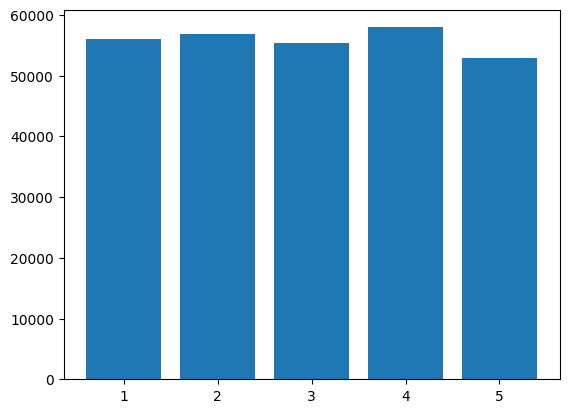

In [ ]:
plt.bar(df3.groupby(df3.overall).count().index, df3.groupby(df3.overall).count().sentence)
plt.show()

In [ ]:
df3.groupby(df3.overall).count()

,column_num,sentence,index
overall,,,
1,55953,55953,55953
2,56794,56794,56794
3,55426,55426,55426
4,57945,57945,57945
5,52939,52939,52939


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279057 entries, 0 to 279056
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   column_num  279057 non-null  int64 
 1   sentence    279057 non-null  object
 2   index       279057 non-null  int64 
 3   overall     279057 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 10.6+ MB


In [ ]:
for i in range(1, 6):
  df3[df3.overall == i].to_csv(f'/content/drive/MyDrive/data/text_to_sentence_{i}.csv', index = False)